In [313]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


# The dataset scope

In [314]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [315]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from IPython.display import HTML, Image

labels = ["age", "resting blood pressure", "serum cholestoral", "maximum heart rate achieved"]
fig = ff.create_distplot([df.age, df.trestbps, df.chol, df.thalach], labels, bin_size=0.5)
fig['layout'].update(title="dataset distribution")
iplot(fig, filename="Distributions")

In [316]:
df.columns
#labels = ["age", "resting blood pressure", "serum cholestoral", "maximum heart rate achieved"]
#fig = ff.create_distplot([df.age, df.trestbps, df.chol, df.thalach], labels, bin_size=0.5)
t0 = go.Box(y=df.age, name="Ages")
t1 = go.Box(y=df.trestbps, name="Bld. pressure")
t2 = go.Box(y=df.chol, name="Cholestoral")
t3 = go.Box(y=df.thalach, name="Max heart rate")
data=[t0,t1,t2,t3]

fig = {
    'data' : data, 
    'layout' : {
        'title' : "dataset stats",
        'yaxis' : {
            'zeroline' : False
        }
    }
}


iplot(fig)

In [331]:
heartDisease = df[df.target == 1] 
noHeartDisease = df[df.target == 0]

t0 = {
    'type' : 'violin',
    'x' : max(heartDisease.age),
    'y' : heartDisease.age.values,
    'name' : 'age distribution of patients with heart disease',
    'box' : {
        'visible' : True
    },
    "meanline" : {
        'visible' : True
    }
}

t1 = {
    'type' : 'violin',
    'x' : max(noHeartDisease.age),
    'y' : noHeartDisease.age.values,
    'name' : 'age distribution of patients without heart disease',
    'box' : {
        'visible' : True
    },
    "meanline" : {
        'visible' : True
    }
}

data = [t0,t1]

fig = {
    'data' : data, 
    'layout' : {
        'title' : 'age distribution',
        'yaxis' : {
            'zeroline' : False
        }
    }
}

iplot(fig, filename="ages", validate=False)

In [318]:
older = heartDisease[["age", "trestbps", "chol", "thalach"]].sort_values(by='age', ascending=False).iloc[0,:]
younger = heartDisease[["age", "trestbps", "chol", "thalach"]].sort_values(by='age', ascending=True).iloc[0,:]

w_older = noHeartDisease[["age", "trestbps", "chol", "thalach"]].sort_values(by='age', ascending=False).iloc[0,:]
w_younger = noHeartDisease[["age", "trestbps", "chol", "thalach"]].sort_values(by='age', ascending=True).iloc[0,:]

print("with heart disease:\n---older\n{}\n---younger\n{}\n\n".format(older, younger))
print("without heart disease:\n---older\n{}\n---younger\n{}".format(w_older, w_younger))

with heart disease:
---older
age          76
trestbps    140
chol        197
thalach     116
Name: 144, dtype: int64
---younger
age          29
trestbps    130
chol        204
thalach     202
Name: 72, dtype: int64


without heart disease:
---older
age          77
trestbps    125
chol        304
thalach     162
Name: 238, dtype: int64
---younger
age          35
trestbps    120
chol        198
thalach     130
Name: 227, dtype: int64


In [319]:

#heartDisease = df[df.target == 1] 
labels = ["age", "resting blood pressure", "cholestoral", "maximum heart rate achieved"]

#to_radar = df[["age", "trestbps", "chol", "thalach"]]
older_with_heart_disease = go.Scatterpolar(
    r = older,
    theta = labels,
    fill = "toself",
    name = "older with heart disease"
)

older_without_heart_disease = go.Scatterpolar(
    r = w_older,
    theta = labels,
    fill = "toself",
    name = "older without heart disease"
)

data = [older_with_heart_disease, older_without_heart_disease]

layout = go.Layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0, 300]
        )
    ),
    showlegend = True,
    title = "older people"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Stats")

In [320]:

#heartDisease = df[df.target == 1] 
labels = ["age", "resting blood pressure", "cholestoral", "maximum heart rate achieved"]

#to_radar = df[["age", "trestbps", "chol", "thalach"]]
younger_with_heart_disease = go.Scatterpolar(
    r = younger,
    theta = labels,
    fill = "toself",
    name = "younger with heart disease"
)

younger_without_heart_disease = go.Scatterpolar(
    r = w_younger,
    theta = labels,
    fill = "toself",
    name = "younger without heart disease"
)

data = [younger_with_heart_disease, younger_without_heart_disease]

layout = go.Layout(
    polar = dict(
        radialaxis = dict(
            visible = True,
            range = [0, 300]
        )
    ),
    showlegend = True,
    title = "younger people"
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Stats")

# Comparing features by agnostic

Features Overview


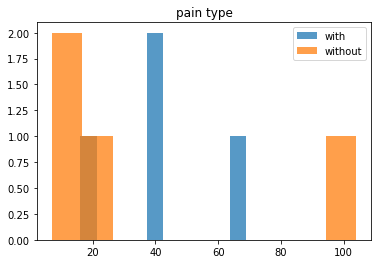

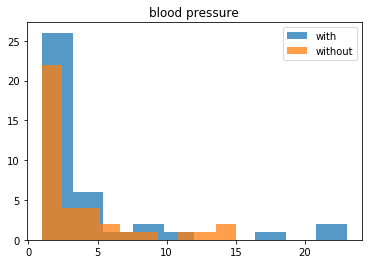

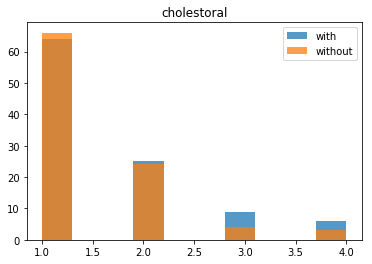

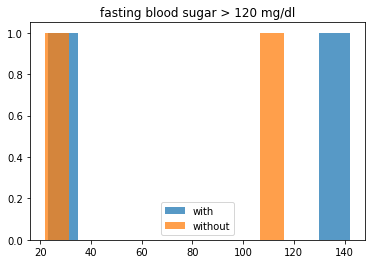

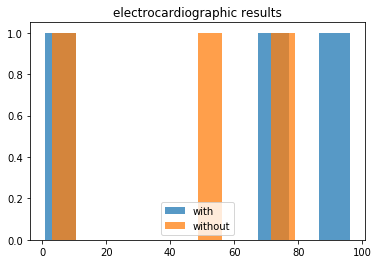

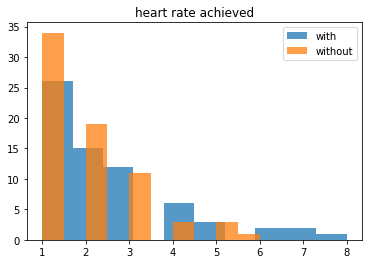

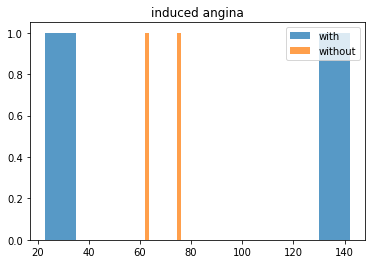

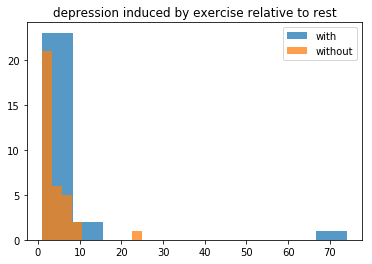

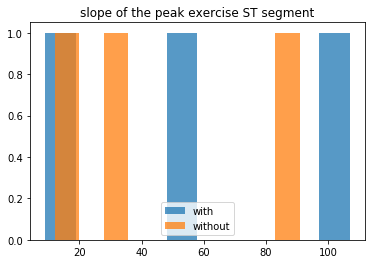

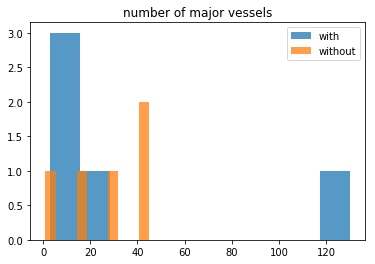

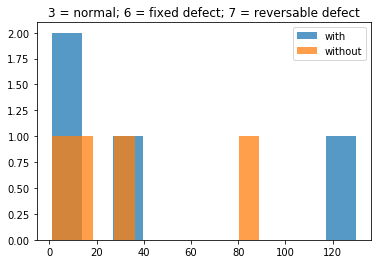

In [321]:
#age
#sex
#cpchest -> pain type
#trestbpsresting -> blood pressure
#cholserum -> cholestoral
#fbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecgresting -> electrocardiographic results
#thalachmaximum -> heart rate achieved
#exangexercise -> induced angina (1 = yes; 0 = no)
#oldpeakST -> depression induced by exercise relative to rest
#slopethe -> slope of the peak exercise ST segment
#ca -> number of major vessels (0-3) colored by flourosopy
#thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect
#target -> 1 or 0
#for c in heartDisease.columns
titles =    ["pain type",
            "blood pressure",
            "cholestoral",
            "fasting blood sugar > 120 mg/dl",
            "electrocardiographic results",
            "heart rate achieved",
            "induced angina",
            "depression induced by exercise relative to rest",
            "slope of the peak exercise ST segment",
            "number of major vessels",
            "3 = normal; 6 = fixed defect; 7 = reversable defect"]

print("Features Overview")
for c, title in zip(heartDisease.columns[2:-1], titles):
    #plt.title("RMS")
    #x = np.arange(0,epochs)
    #plt.plot(x,train_loss_RMS,label = "train")
    #plt.plot(x,test_loss_RMS,label = "test")
    #plt.xlabel("epochs")
    #plt.ylabel("loss")
    #plt.legend()
    #plt.show()
    plt.title(str(title))
    plt.hist(heartDisease[c].value_counts(), alpha=0.75, label="with")
    plt.hist(noHeartDisease[c].value_counts(), alpha=0.75, label="without")
    plt.legend()
    plt.show()

# Predicting heart disease

## handle input data

In [322]:
train = df.sample(220)
test = df.sample(100)

x = train.iloc[:,:-1].values
y = train.iloc[:,-1:].values

x_train = x[:-100]
y_train = y[:-100]

x = test.iloc[:,:-1].values
y = test.iloc[:,-1:].values

x_test = x[-100:]
y_test = y[-100:]

print("train shapes:\nx {}\ny {}\n".format(x_train.shape, y_train.shape))
print("test shapes:\nx {}\ny {}\n".format(x_test.shape, y_test.shape))

train shapes:
x (120, 13)
y (120, 1)

test shapes:
x (100, 13)
y (100, 1)



In [323]:
import torch
import torchvision

x_train, y_train = torch.Tensor(x_train), torch.Tensor(y_train)
x_test, y_test = torch.Tensor(x_test), torch.Tensor(y_test)

print(x_train.type())
print(y_train.type())
print(x_test.type())
print(y_test.type())

torch.FloatTensor
torch.FloatTensor
torch.FloatTensor
torch.FloatTensor


# Model architecture

In [324]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(13, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 1)
        self.activation = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return x

In [325]:
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=13, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (activation): Sigmoid()
)


In [326]:
# Loss and Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.BCELoss()
print(optimizer)
print(loss_fn)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
BCELoss()


In [327]:
for param in model.parameters():
    param.requires_grad = True

In [328]:
def step(x, threshold=0.5):
    if x >= threshold:
        return 1
    else:
        return 0

In [329]:
# training the model
n_epochs = 100

for epoch in range(n_epochs):
    loss_per_epoch = 0
    preds = []
    model.train()
    for patient, diagnose in zip(x_train, y_train):
        optimizer.zero_grad()
        
        pred = model(patient)
        #print(pred)
        loss = loss_fn(pred, diagnose)
        #print(loss)
        loss.backward(retain_graph=True)
        optimizer.step()
        
        with torch.no_grad():
            loss_per_epoch += loss.item()
            preds.append(step(pred.item()))
            
    model.eval()
    acc = sum([1 if a==b else 0 for a,b in zip(preds, y_train)]) / len(x_train)
    loss_per_epoch /= len(x_train)
    print("Epoch {} Loss {} Acc on Train {}".format(epoch, loss_per_epoch, acc))

Epoch 0 Loss 0.709813063343366 Acc on Train 0.48333333333333334
Epoch 1 Loss 0.6952898154656092 Acc on Train 0.5166666666666667
Epoch 2 Loss 0.6804119475185871 Acc on Train 0.55
Epoch 3 Loss 0.6653681886692842 Acc on Train 0.6166666666666667
Epoch 4 Loss 0.6513521668811639 Acc on Train 0.6583333333333333
Epoch 5 Loss 0.6382630087435246 Acc on Train 0.65
Epoch 6 Loss 0.631100840245684 Acc on Train 0.6666666666666666
Epoch 7 Loss 0.6248073699573676 Acc on Train 0.675
Epoch 8 Loss 0.6096629586070776 Acc on Train 0.7
Epoch 9 Loss 0.6076546553522348 Acc on Train 0.7
Epoch 10 Loss 0.604135409494241 Acc on Train 0.6833333333333333
Epoch 11 Loss 0.5992231783767541 Acc on Train 0.6916666666666667
Epoch 12 Loss 0.5940261958166957 Acc on Train 0.7083333333333334
Epoch 13 Loss 0.5939839138338964 Acc on Train 0.7
Epoch 14 Loss 0.599047717700402 Acc on Train 0.6583333333333333
Epoch 15 Loss 0.5875130206346512 Acc on Train 0.7083333333333334
Epoch 16 Loss 0.5894078542167942 Acc on Train 0.675
Epoch 1

In [330]:
preds_test = []
for x, y in zip(x_test, y_test):
    pred = model(x)
    preds_test.append(step(pred.item()))
    
acc = [1 if a==b else 0 for a,b in zip(preds_test, y_test)]
print("Accuracy: {}".format(sum(acc)/len(y_train)))

Accuracy: 0.7


## simple MLP using pytorch gives us a model with 70% accuracy. There's no much data... So, i think it's ok, no good, just ok.